In [2]:
import seaborn as sns
import pandas as pd
sns.set()
genes_in_each_pos_df = pd.read_csv("genes_in_each_pos_df.csv")
genes_in_each_pos_df


,Unnamed: 0,desc,nb_of_genes,count
0,0,063_STEC chrom,0,577365
1,1,063_STEC chrom,1,4158238
2,2,063_STEC chrom,2,161978
3,3,063_STEC chrom,3,6953
4,4,063_STEC chrom,4,642
...,...,...,...,...
388,388,MSB2_1A pl1,4,160
389,389,MSB2_1A pl2,1,3356
390,390,MSB2_1A pl2,0,2522
391,391,MSB2_1A pl4,0,709


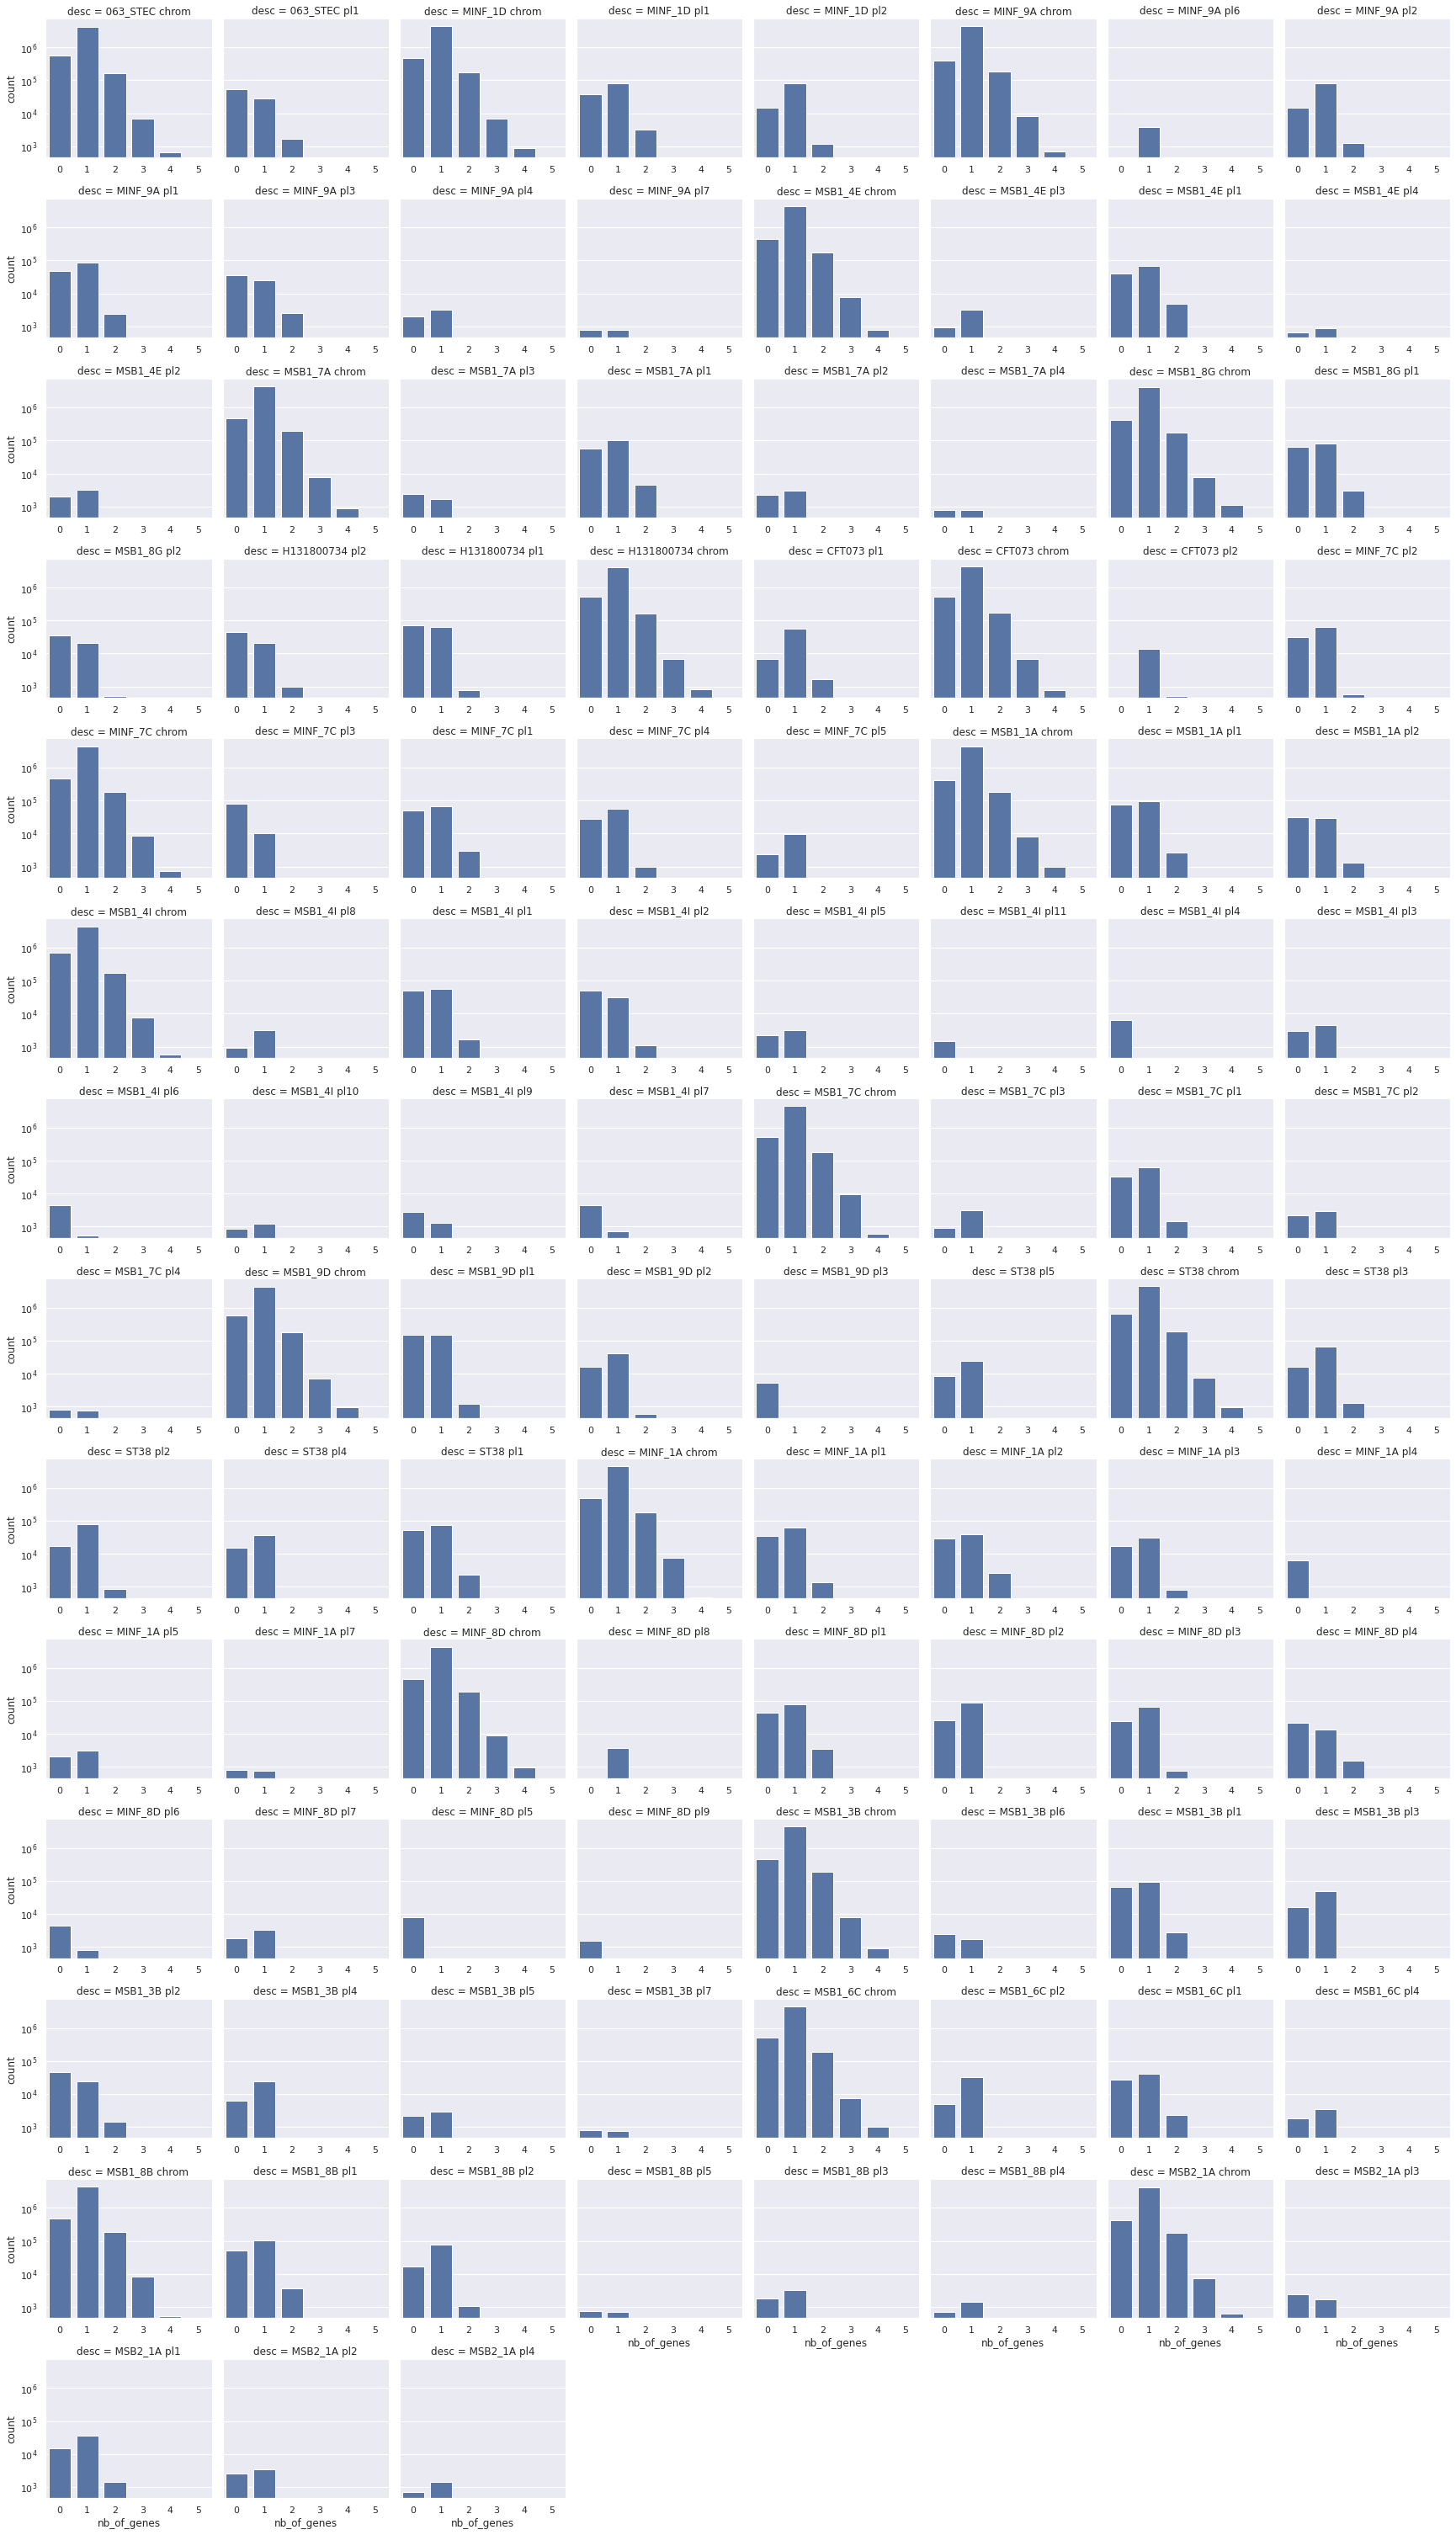

In [8]:
plot = sns.FacetGrid(genes_in_each_pos_df, col="desc", col_wrap=8)
plot.map(sns.barplot, "nb_of_genes", "count",
         order=list(range(max(genes_in_each_pos_df.nb_of_genes)+1))).set(yscale = 'log')
for ax in plot.axes.flatten():
    ax.tick_params(labelbottom=True)
plot

In [29]:
from collections import defaultdict
genes_in_each_pos_df_for_chrom = genes_in_each_pos_df[genes_in_each_pos_df.desc.str.contains("chrom")]

def summarise_nb_of_genes(row, accumulator_dict):
    nb_of_genes = min(row["nb_of_genes"], 2)
    if nb_of_genes == 2:
        nb_of_genes = "2+"
    else:
        nb_of_genes = str(nb_of_genes)
    accumulator_dict[row["desc"]][nb_of_genes] += row["count"]
        
    
accumulator_dict = defaultdict(lambda: defaultdict(int))
nb_of_genes_summary = genes_in_each_pos_df_for_chrom.apply(summarise_nb_of_genes, axis=1, accumulator_dict=accumulator_dict)

descs=[]
nb_of_genes=[]
counts=[]
for desc, count_dict in accumulator_dict.items():
    for number in ["0", "1", "2+"]:
        descs.append(desc)
        nb_of_genes.append(number)
        counts.append(accumulator_dict[desc][number])

genes_in_each_pos_df_for_chrom = pd.DataFrame(data={"desc": descs, "nb_of_genes": nb_of_genes, "count": counts})
genes_in_each_pos_df_for_chrom

,desc,nb_of_genes,count
0,063_STEC chrom,0,577365
1,063_STEC chrom,1,4158238
2,063_STEC chrom,2+,169693
3,MINF_1D chrom,0,473776
4,MINF_1D chrom,1,4432469
5,MINF_1D chrom,2+,185964
6,MINF_9A chrom,0,400769
7,MINF_9A chrom,1,4524142
8,MINF_9A chrom,2+,196900
9,MSB1_4E chrom,0,436733


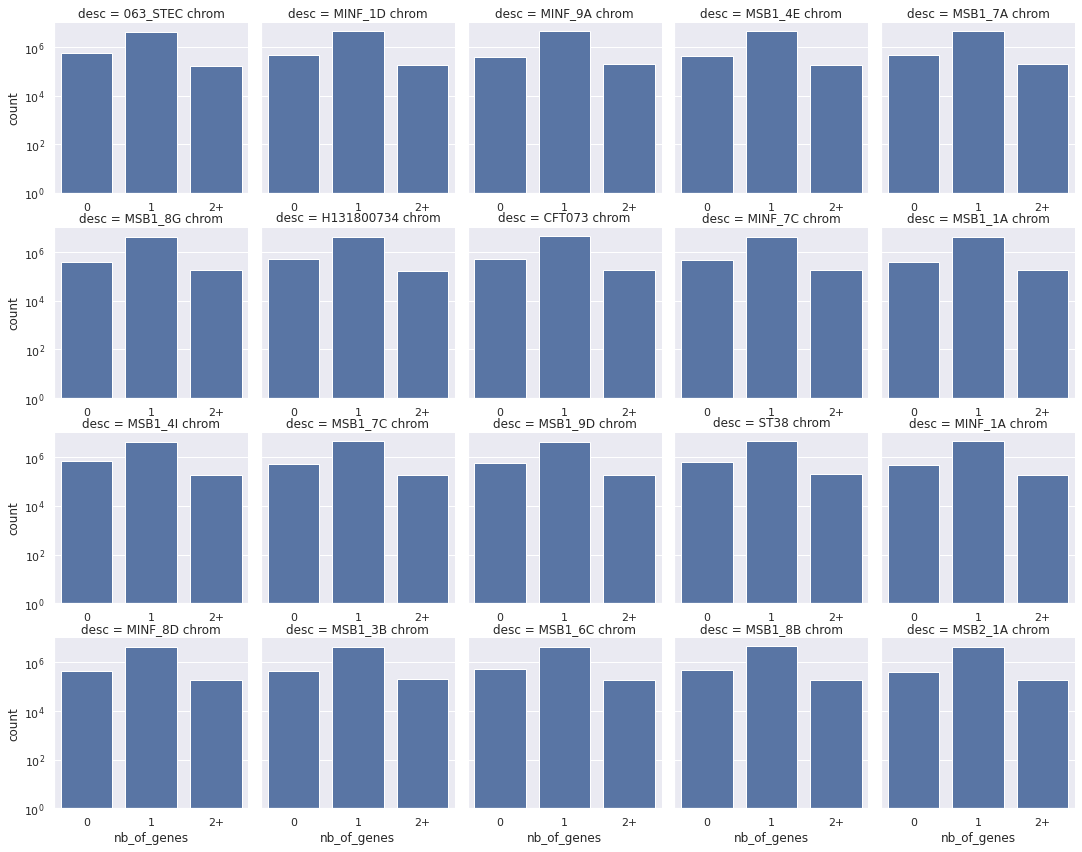

In [33]:
plot = sns.FacetGrid(genes_in_each_pos_df_for_chrom, col="desc", col_wrap=5)
plot.map(sns.barplot, "nb_of_genes", "count",
         order=["0", "1", "2+"]).set(yscale = 'log', ylim=(1, 10000000))
for ax in plot.axes.flatten():
    ax.tick_params(labelbottom=True)
plot

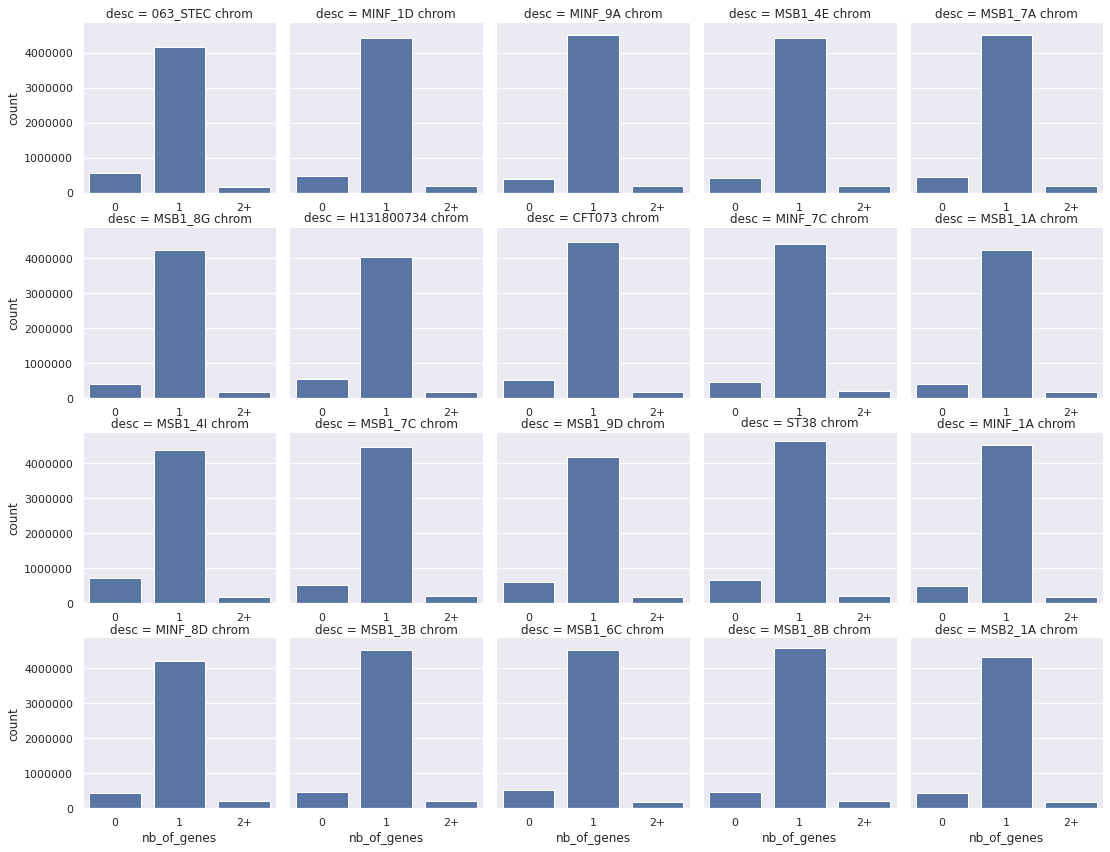

In [40]:
plot = sns.FacetGrid(genes_in_each_pos_df_for_chrom, col="desc", col_wrap=5)
plot.map(sns.barplot, "nb_of_genes", "count", order=["0", "1", "2+"])
for ax in plot.axes.flatten():
    ax.tick_params(labelbottom=True)
    ax.ticklabel_format(style='plain', axis='y')
plot

In [43]:
import copy
accumulator_dict_perc = copy.deepcopy(accumulator_dict)
for desc, chrom_to_count in accumulator_dict.items():
    total = sum(chrom_to_count.values())
    for nb_of_genes in ["0", "1", "2+"]:
        accumulator_dict_perc[desc][nb_of_genes] = accumulator_dict[desc][nb_of_genes] / total * 100

descs=[]
nb_of_genes=[]
proportions=[]
for desc, proportion_dict in accumulator_dict_perc.items():
    for number in ["0", "1", "2+"]:
        descs.append(desc)
        nb_of_genes.append(number)
        proportions.append(accumulator_dict_perc[desc][number])

genes_in_each_pos_df_for_chrom_prop = pd.DataFrame(data={"desc": descs, "nb_of_genes": nb_of_genes, "proportion": proportions})
genes_in_each_pos_df_for_chrom

defaultdict(<function __main__.<lambda>()>,
            {'063_STEC chrom': defaultdict(int,
                         {'0': 11.770237718580082,
                          '1': 84.77037879059694,
                          '2+': 3.45938349082298}),
             'MINF_1D chrom': defaultdict(int,
                         {'1': 87.0441295712725,
                          '0': 9.303938624671533,
                          '2+': 3.6519318040559607}),
             'MINF_9A chrom': defaultdict(int,
                         {'1': 88.33090483034223,
                          '0': 7.824751830944172,
                          '2+': 3.844343338713592}),
             'MSB1_4E chrom': defaultdict(int,
                         {'1': 87.74123744664305,
                          '0': 8.629047363508546,
                          '2+': 3.6297151898484072}),
             'MSB1_7A chrom': defaultdict(int,
                         {'1': 87.19228208960186,
                          '0': 8.948240844326687,
       

In [ ]:
plot = sns.FacetGrid(genes_in_each_pos_df_for_chrom, col="desc", col_wrap=5)
plot.map(sns.barplot, "nb_of_genes", "count", order=["0", "1", "2+"])
for ax in plot.axes.flatten():
    ax.tick_params(labelbottom=True)
    ax.ticklabel_format(style='plain', axis='y')
plot